### Practice Project - 5

# Japan Used Cars Price Prediction
Problem Statement:

Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')
cars_data

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [3]:
cars_data.head ()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
cars_data.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [5]:
cars_columns = ['price', 'year', 'mileage', 'engine_capacity', 'transmission', 'drive', 'hand_drive','fuel']

In [6]:
cars_data = cars_data [cars_columns].copy()

In [7]:
cars = cars_data.rename ({'price':'Price','year':'Year', 'mileage':'Mileage', 'engine_capacity':'Engine_Capacity',
                          'transmission':'Transmission', 'drive':'Drive', 'hand_drive':'Hand_Drive',
                         'fuel':'Fuel'}, axis = 1)
cars

,Price,Year,Mileage,Engine_Capacity,Transmission,Drive,Hand_Drive,Fuel
0,80,2003,80000,1240,at,2wd,rhd,gasoline
1,110,2010,53000,1200,at,2wd,rhd,gasoline
2,165,2005,47690,2000,at,2wd,rhd,gasoline
3,190,2008,130661,1990,at,2wd,rhd,gasoline
4,190,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...
2313,1400,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,2000,170000,660,at,4wd,rhd,gasoline


In [8]:
cars.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            2318 non-null   int64 
 1   Year             2318 non-null   int64 
 2   Mileage          2318 non-null   int64 
 3   Engine_Capacity  2318 non-null   int64 
 4   Transmission     2318 non-null   object
 5   Drive            2318 non-null   object
 6   Hand_Drive       2318 non-null   object
 7   Fuel             2318 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.0+ KB


In [9]:
cars.isna().sum()

Price              0
Year               0
Mileage            0
Engine_Capacity    0
Transmission       0
Drive              0
Hand_Drive         0
Fuel               0
dtype: int64

In [10]:
print('-'*35)
print (cars.Transmission.value_counts())
print('-'*35)
print (cars.Drive.value_counts())
print('-'*35)
print (cars.Fuel.value_counts ())
print('-'*35)
print (cars.Hand_Drive.value_counts())
print('-'*35)
print (cars.Year.value_counts())
print('-'*35)

-----------------------------------
at     2171
mt      117
cvt      30
Name: Transmission, dtype: int64
-----------------------------------
2wd    2121
4wd     192
awd       5
Name: Drive, dtype: int64
-----------------------------------
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: Fuel, dtype: int64
-----------------------------------
rhd       2301
lhd         16
center       1
Name: Hand_Drive, dtype: int64
-----------------------------------
2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: Year, dtype: int64
-----------------------------------


In [11]:
cars.replace({'Transmission':{'at':0,'mt':1 ,'cvt':2}},inplace = True)
cars.replace({'Drive':{'2wd':0, '4wd':1, 'awd':2}},inplace = True)
cars.replace({'Fuel':{'gasoline':0, 'diesel':1, 'lpg':2, 'hybrid':3, 'cng':4}}, inplace = True)
cars.replace ({'Hand_Drive':{'rhd':0, 'lhd':1, 'center':2}}, inplace = True)
cars.replace({2005:0,
2007:1,
2003:2,
2006:3,
2009:4,
2004:5,
2011:6,
2010:7,
2008:8,
2002:9,
2001:10,
2013:11,
2012:12,
1999:13, 
2000:14,
1998:15,   
1997:16,    
1996:17,    
1995:18,    
1993:19,    
1994:20,    
2014:21,     
1990:22,     
1991:23,     
1992:24,     
1979:25,     
1982:26,     
2015:27,     
1987:28,     
1988:29,}, inplace = True) 

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            2318 non-null   int64
 1   Year             2318 non-null   int64
 2   Mileage          2318 non-null   int64
 3   Engine_Capacity  2318 non-null   int64
 4   Transmission     2318 non-null   int64
 5   Drive            2318 non-null   int64
 6   Hand_Drive       2318 non-null   int64
 7   Fuel             2318 non-null   int64
dtypes: int64(8)
memory usage: 145.0 KB


In [13]:
cars.describe()

,Price,Year,Mileage,Engine_Capacity,Transmission,Drive,Hand_Drive,Fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,4.584987,100012.338223,1275.373598,0.076359,0.087144,0.007765,0.018119
std,288.673112,4.325091,52514.094895,692.977905,0.310571,0.289655,0.092583,0.184930
min,80.000000,0.000000,14.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,1.000000,67000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,4.000000,94000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
75%,1213.000000,7.000000,124000.000000,1500.000000,0.000000,0.000000,0.000000,0.000000
max,1400.000000,29.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


In [14]:
cars

,Price,Year,Mileage,Engine_Capacity,Transmission,Drive,Hand_Drive,Fuel
0,80,2,80000,1240,0,0,0,0
1,110,7,53000,1200,0,0,0,0
2,165,0,47690,14,0,0,0,0
3,190,8,130661,22,0,0,0,0
4,190,3,66300,660,0,0,0,0
...,...,...,...,...,...,...,...,...
2313,1400,4,121000,996,0,0,0,0
2314,1400,2,101000,3000,0,0,0,0
2315,1400,0,101000,660,2,0,0,0
2316,1400,14,170000,660,0,1,0,0


In [15]:
features = ['Year', 'Mileage','Engine_Capacity', 'Transmission', 'Drive', 'Hand_Drive', 'Fuel' ]
label = ['Price']

X = cars[features]

Y = cars[label]

In [16]:
cars.describe()

,Price,Year,Mileage,Engine_Capacity,Transmission,Drive,Hand_Drive,Fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,4.584987,100012.338223,1275.373598,0.076359,0.087144,0.007765,0.018119
std,288.673112,4.325091,52514.094895,692.977905,0.310571,0.289655,0.092583,0.184930
min,80.000000,0.000000,14.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,1.000000,67000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,4.000000,94000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
75%,1213.000000,7.000000,124000.000000,1500.000000,0.000000,0.000000,0.000000,0.000000
max,1400.000000,29.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


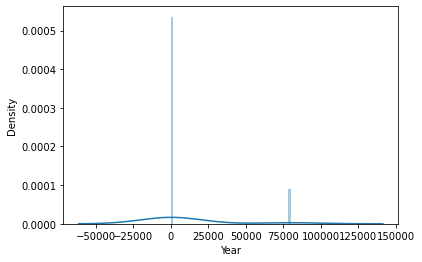

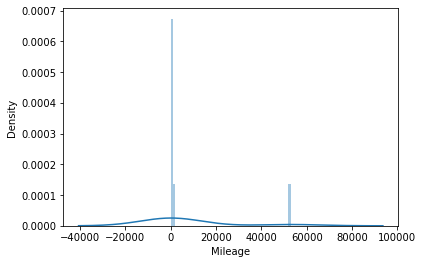

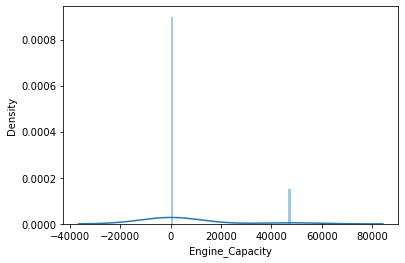

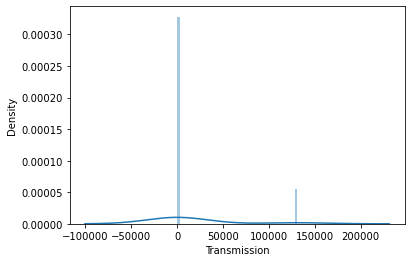

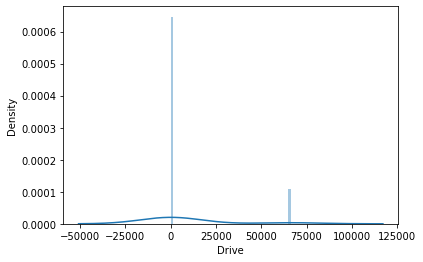

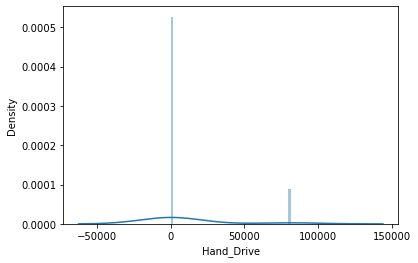

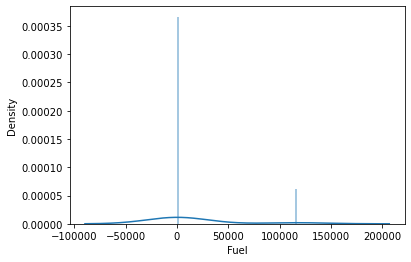

In [19]:
x2 = X.values
for i in range(0,7):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

In [20]:
scaler = MinMaxScaler()


In [21]:
X.head()

,Year,Mileage,Engine_Capacity,Transmission,Drive,Hand_Drive,Fuel
0,2,80000,1240,0,0,0,0
1,7,53000,1200,0,0,0,0
2,0,47690,14,0,0,0,0
3,8,130661,22,0,0,0,0
4,3,66300,660,0,0,0,0


In [22]:
X=preprocessing.scale(X)

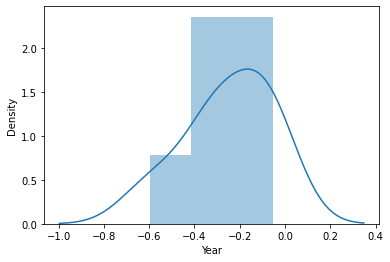

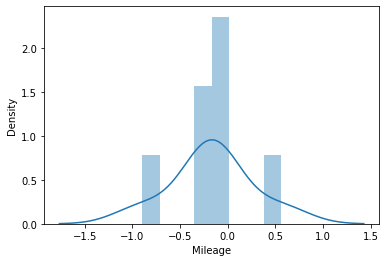

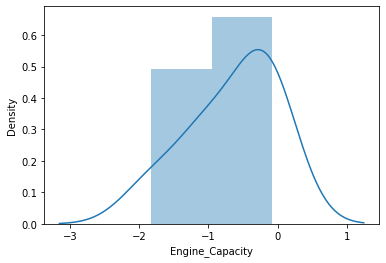

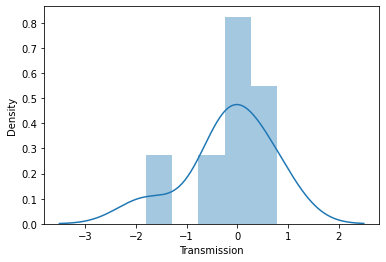

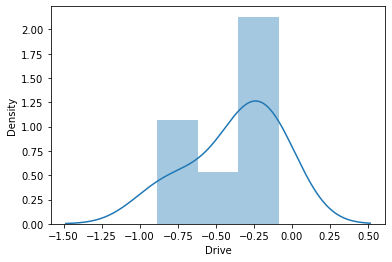

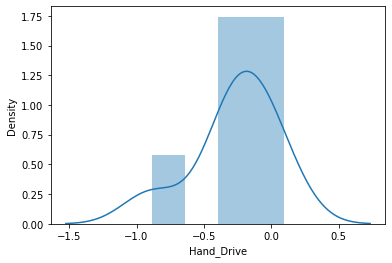

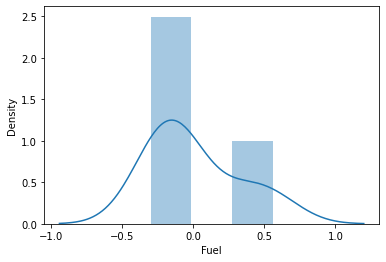

In [23]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(0,7):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.20, random_state=3)

In [25]:
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

In [29]:
print('Shape of X_train = ' , str(X_train.shape))
print('Shape of X_test = ' ,str(X_test.shape))
print('Shape of Y_train = ' , str(Y_train.shape))
print('Shape of Y_test = ' ,str(Y_test.shape))

Shape of X_train =  (1854, 7)
Shape of X_test =  (464, 7)
Shape of Y_train =  (1854,)
Shape of Y_test =  (464,)


In [26]:
# Model Training (Random forest)
model = RandomForestClassifier ()
model.fit (X_train, Y_train)

RandomForestClassifier()

In [27]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score (X_train_prediction, Y_train)
print ('Accuracy = ', train_data_accuracy)

Accuracy =  0.9838187702265372


In [28]:
# Model evaluation on our test data
# accurary on test date

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction, Y_test)
print ('Accuracy = ', test_data_accuracy)

Accuracy =  0.04525862068965517
